# Census Income Project
## Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 
#### The prediction task is to determine whether a person makes over $50K a year.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
census = pd.read_csv('D:/Flip-Robo/census_income.csv')

In [3]:
#overview data
census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# total number of records
no_records = census.shape[0]

# total number of features
no_features = census.shape[1]

# number of records where individual's income is more than $50k
no_greater_50k = census[census['Income'] == ' <=50K'].shape[0]

# number of records where individual's income is at most $50k
no_at_most_50k = census[census['Income'] == ' >50K'].shape[0]

# percentage of individuals whose income is more than $50k
greater_percent =  (no_greater_50k / no_records) * 100

# print the results
print("Total number of records: {}".format(no_records))
print("Total number of features: {}".format(no_features))
print("Individuals making more than $50k: {}".format(no_greater_50k))
print("Individuals making at most $50k: {}".format(no_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Total number of records: 32560
Total number of features: 15
Individuals making more than $50k: 24719
Individuals making at most $50k: 7841
Percentage of individuals making more than $50k: 75.92%


# Data Filtering

In [6]:
# drop futile columns
census.drop('Education', inplace=True, axis=1)
census.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [7]:
# check for nulls
census.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
# check duplicates and removing
print("Before removing duplicates:", census.duplicated().sum())

census = census[~census.duplicated()]

print("After removing duplicates:", census.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


In [9]:
# before discarding
census.Sex.value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

In [10]:
# discard spaces from entries
columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for column in columns:
    census[column] = census[column].str.strip()

In [11]:
# after discarding
census.Sex.value_counts()

Male      21774
Female    10762
Name: Sex, dtype: int64

In [12]:
# before changing "?"
census.Workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [13]:
# changing "?" to Unknown
change_columns = ['Workclass', 'Occupation', 'Native_country']
for column in change_columns:
        census[column] = census[column].replace({'?': 'Unknown'})

In [14]:
# after changing "?"
census.Workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

# Data Exploration

In [15]:
#statistics about the data
census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


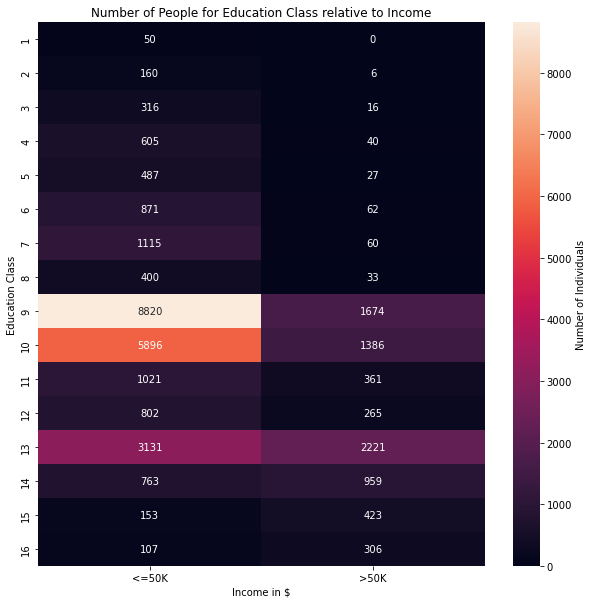

In [16]:
#Heat map
plt.figure(figsize=[10,10])
 
ct_counts = census.groupby(['Education_num', 'Income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'Education_num', columns = 'Income', values = 'count').fillna(0)

sb.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income in $')
plt.ylabel('Education Class');

The majority of the dataset consists of individuals with education levels between 9 and 10. People with education levels 14 through 16 typically earn over $50K annually.

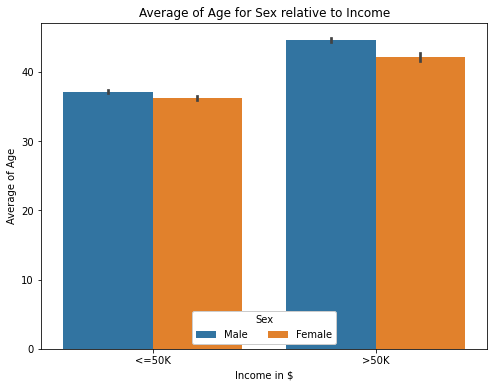

In [17]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sb.barplot(data = census, x = 'Income', y = 'Age', hue = 'Sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income in $')
plt.ylabel('Average of Age');

The graph demonstrates that, on average, those with >50K have a greater average age than those with =50K. And in both income categories, we can observe that the average age of the male category is a little bit higher than that of the female category.

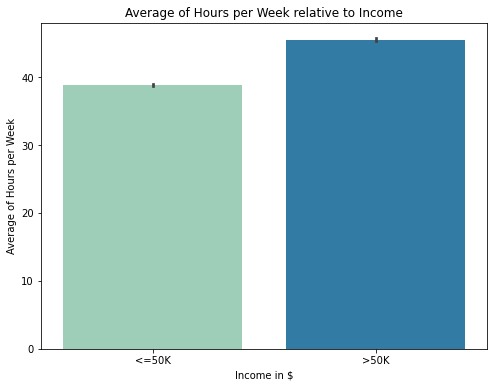

In [18]:
# Bar Chart 
plt.figure(figsize=[8,6])
sb.barplot(data=census, x='Income', y='Hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income in $')
plt.ylabel('Average of Hours per Week');

It is clear from this that income increases directly as the average weekly number of hours worked, which is a rational and acceptable conclusion.

# Data Preprocessing

In [19]:
census_prep = census.copy()

We made a copy of the dataset so that we could keep the cleaned version for future use and utilise the copied version to get the data ready for the model.

In [20]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Fnlwgt']

scaler = MinMaxScaler()
census_prep[numerical] = scaler.fit_transform(census_prep[numerical])

In [21]:
census_prep.sample(3)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
12595,0.150685,Private,0.131112,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,0.397959,United-States,<=50K
17275,0.054795,Private,0.129527,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,0.397959,United-States,<=50K
14341,0.260274,Private,0.084254,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,0.397959,United-States,>50K


The data has been scaled for numerical features using MinMaxScalling, which changes the data's range to fall between 0 and 1. That would aid in properly preparing the data for the model.

In [22]:
# Encoding
census_prep['Sex'] = census_prep.Sex.replace({"Female": 0, "Male": 1})
census_prep['Income'] = census_prep.Income.replace({"<=50K": 0, ">50K": 1})

# Create dummy variables
census_prep = pd.get_dummies(census_prep)

In [23]:
encoded = list(census_prep.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

92 total features after one-hot encoding.


To convert the category features into numerical data, we have hot-encoded them and produced dummy variables. Hence numerical representation and simpler processing

# Experimental Process
### Here Income variable is considered to be the dependent variable

In [24]:
# importing classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# import needed functions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [25]:
# Partioning the data
X = census_prep.drop('Income', axis=1)
y = census_prep['Income']

# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
models = {}

# models with default parameter
models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()

In [27]:
# Cross validation
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print(".........................................................")

LogisticRegression:
Accuracy: train:  0.8501044909165902 | test:  0.8491825643963964
F1-score: train:  0.6562799566200118 | test:  0.6545890833818604
.........................................................
RandomForest:
Accuracy: train:  0.9999615813131507 | test:  0.8560363766919631
F1-score: train:  0.9999202640846192 | test:  0.6749325636317665
.........................................................
AdaBoost:
Accuracy: train:  0.861115379558884 | test:  0.8602165848720997
F1-score: train:  0.681746966054651 | test:  0.679097227079003
.........................................................


The analysis of our dataset suggests that there is an imbalance between the classification classes. Since 75% of the data comes from those with annual incomes of over $50k. So, we would try to do oversampling.

In [28]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [29]:
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999645706724657 | test:  0.9365106224268909
F1-score: train:  0.9999645722094159 | test:  0.9394685400352092


# Conclusions
## Features Importance

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
census_conc = census.copy()

In [32]:
for col in census_conc.columns:
    if census_conc[col].dtypes == 'object':
        encoder = LabelEncoder()
        census_conc[col] = encoder.fit_transform(census_conc[col])

In [33]:
# Partioning the data
Xx = census_conc.drop('Income', axis=1)
Yy = census_conc['Income']

# Splitting to training and testing
Xx_train, Xx_test, Yy_train, Yy_test = train_test_split(Xx, Yy, test_size=0.2, random_state=42)

In [34]:
clf = RandomForestClassifier()
clf.fit(Xx_train, Yy_train)


# list of the features and their importance scores
print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(Xx.columns.tolist(), clf.feature_importances_ * 100), columns=['feature', 'importance'])
feat_imp


Features Importance:


,feature,importance
0,Age,14.874710
1,Workclass,3.990900
2,Fnlwgt,16.869985
3,Education_num,12.266146
4,Marital_status,7.092791
5,Occupation,6.642574
6,Relationship,9.825696
7,Race,1.372910
8,Sex,1.415159
9,Capital_gain,11.720397


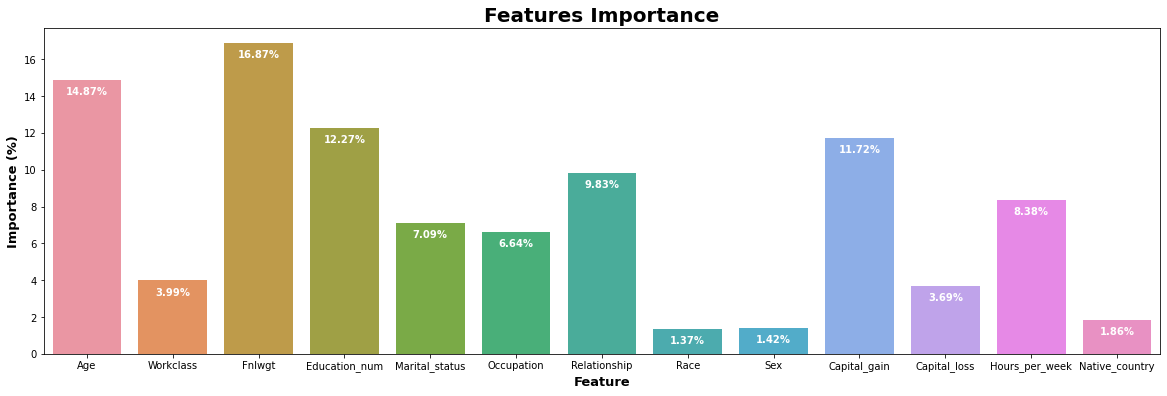

In [35]:
# Features importance plot
plt.figure(figsize=[20,6])
sb.barplot(data=feat_imp, x='feature', y='importance')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13);


# add annotations
impo = feat_imp['importance']
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')

To fasten the fitting of the model, we intend to remove features with less than 4% relevance. Since it would produce the same evaluation results without them.

## Feature Selection

In [36]:
census_final = census.copy()

In [37]:
census_final.head(2)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [38]:
census_final.drop(['Race', 'Sex', 'Capital_loss', 'Native_country'], axis=1, inplace=True)

In [39]:
# Scalling
numerical = ['Age', 'Capital_gain', 'Hours_per_week', 'Fnlwgt']
scaler = MinMaxScaler()
census_final[numerical] = scaler.fit_transform(census_final[numerical])

# Encoding
census_final['Income'] = census_final.Income.replace({"<=50K": 0, ">50K": 1})

# Create dummy variables
census_final = pd.get_dummies(census_final)

# Partioning
Xf = census_final.drop('Income', axis=1)
yf = census_final['Income']

# Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(Xf, yf)

In [40]:
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999797546516825 | test:  0.9315909444960269
F1-score: train:  0.9999797545235791 | test:  0.9350710298656362
